In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager
# mpl.use('Agg')
# params = {'font.family': 'serif','font.serif': 'Times', 'text.usetex': True,'mathtext.fontset': 'custom'}
# mpl.rcParams.update(params)
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import cv2

In [2]:
video_root = '/mnt/cephfs/ec/home/chenzhuokun/git/swallowProject/2stages/datas'
video_root = '/mnt/cephfs/dataset/swallow_videos_date1214_size128/'

In [4]:
videos = os.listdir(video_root)
videos = [video for video in videos if '_4.avi' in video]
videos = [os.path.join(video_root, video) for video in videos]

In [3]:
name = '2_53.21988655321966_2020122102_zhang1yu4zhen11_cha2ti3_2020_12_21_115208_4'
name = '3_112.0_2021063001_li3wei3qiang2_jian4kang1cha2ti3_2021_06_30_114059_64'

In [4]:
video_name = os.path.join(video_root, name + '.avi')
# video_name = videos[33]

In [36]:
video_name

'/mnt/cephfs/ec/home/chenzhuokun/git/swallowProject/2stages/datas/2_53.21988655321966_2020122102_zhang1yu4zhen11_cha2ti3_2020_12_21_115208_4.avi'

In [28]:
import sys
sys.path.append("../")
from libs.utils import VideoKeypointProcessor

In [37]:
# set cuda device to 7
processor = VideoKeypointProcessor('/mnt/cephfs/home/zhoukai/Codes/vfss/vfss_keypoint/models/pytorch/best_model_trace.pt',
                                       sigma=4,device='cuda:7',crop_mode='none')

In [13]:
processor

In [38]:
keypoint, line, fusion = processor.infer_heatmaps(video_name)

Inferencing keypoints: 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


In [9]:
keypoint[0].shape

(612, 612)

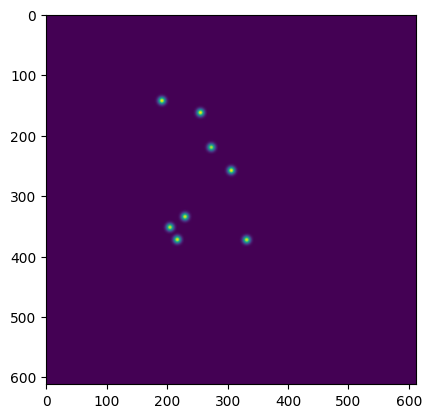

In [39]:
plt.imshow(keypoint[23])

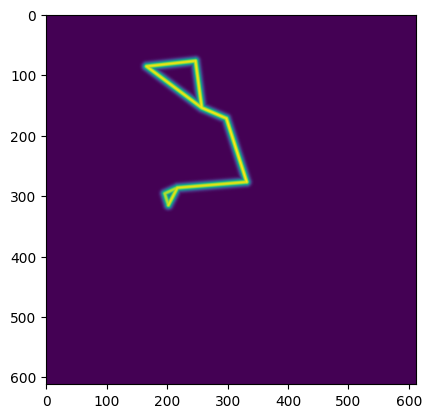

In [11]:
plt.imshow(line[23])

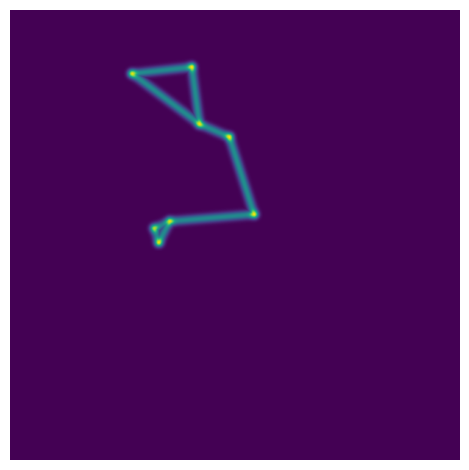

In [12]:
plt.imshow(fusion[23])
plt.axis('off')
plt.tight_layout()

In [5]:
# original video
import skvideo.io
videodata = skvideo.io.vread(video_name)

In [32]:
video_name 

'/mnt/cephfs/ec/home/chenzhuokun/git/swallowProject/2stages/datas/65_181.84851518184644_2021012801_zhong1lin2bin101_cha2ti3_2021_01_28_152035_4.avi'

In [15]:
videodata.shape

(120, 612, 612, 3)

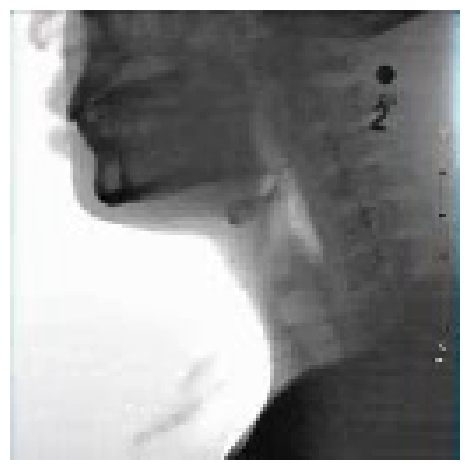

In [9]:
plt.imshow(videodata[533])
# axis off
plt.axis('off')
plt.tight_layout()

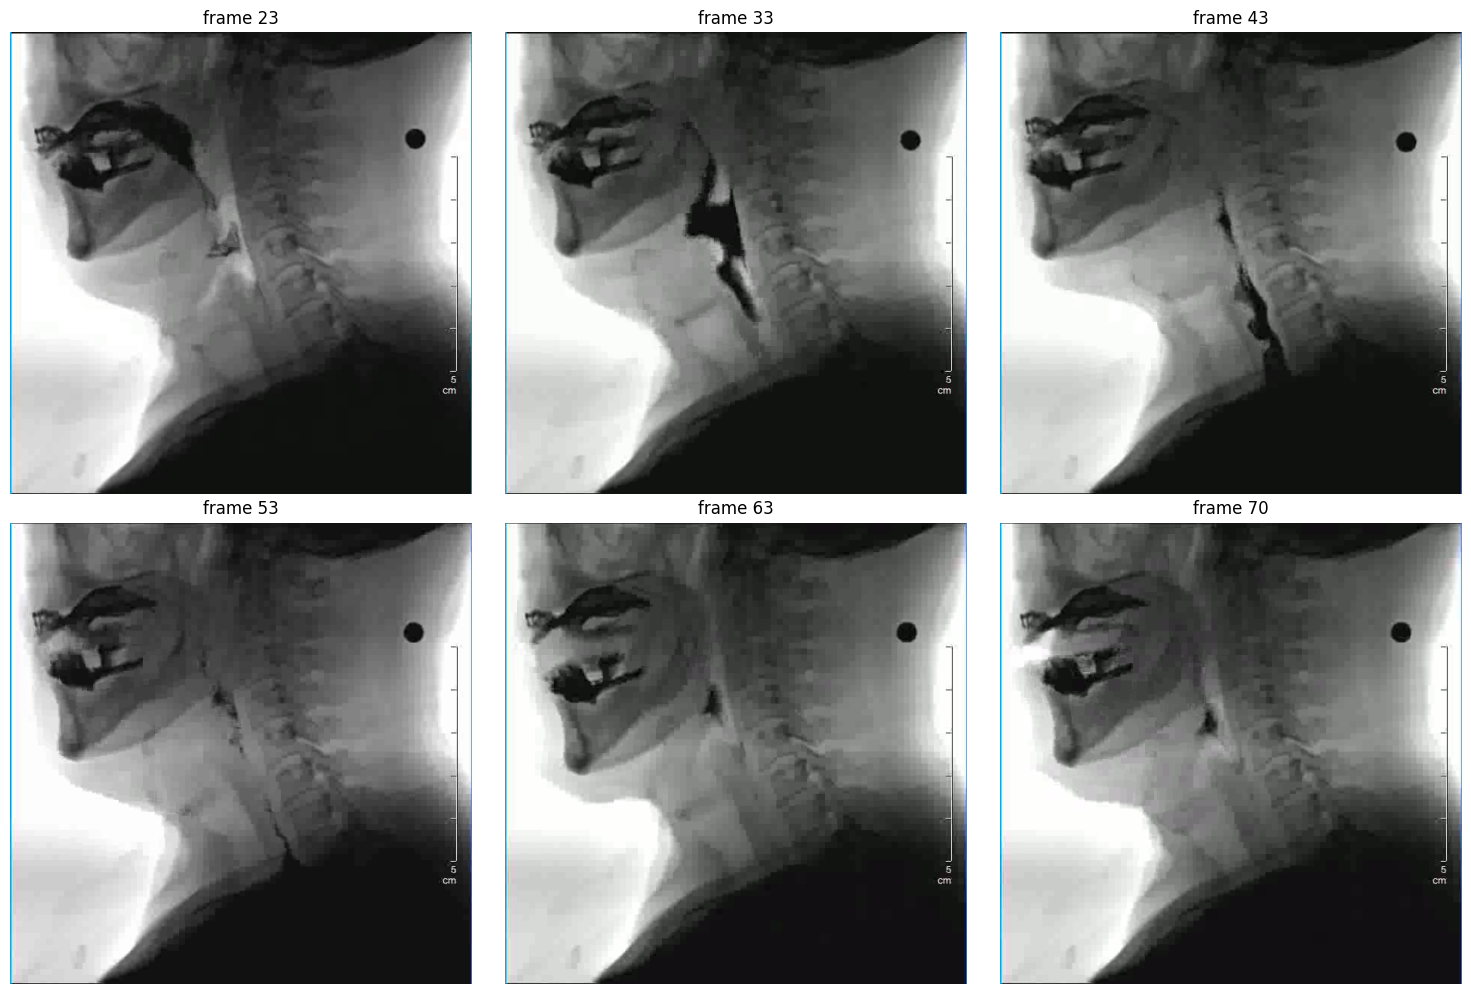

In [17]:
# sequence of keypoint heatmaps and original video
sequence_index = [23, 33, 43, 53, 63, 70]
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, index in enumerate(sequence_index):
    axs[i//3, i%3].imshow(videodata[index])
    axs[i//3, i%3].axis('off')
    axs[i//3, i%3].set_title(f'frame {index}')
plt.tight_layout()
plt.show()

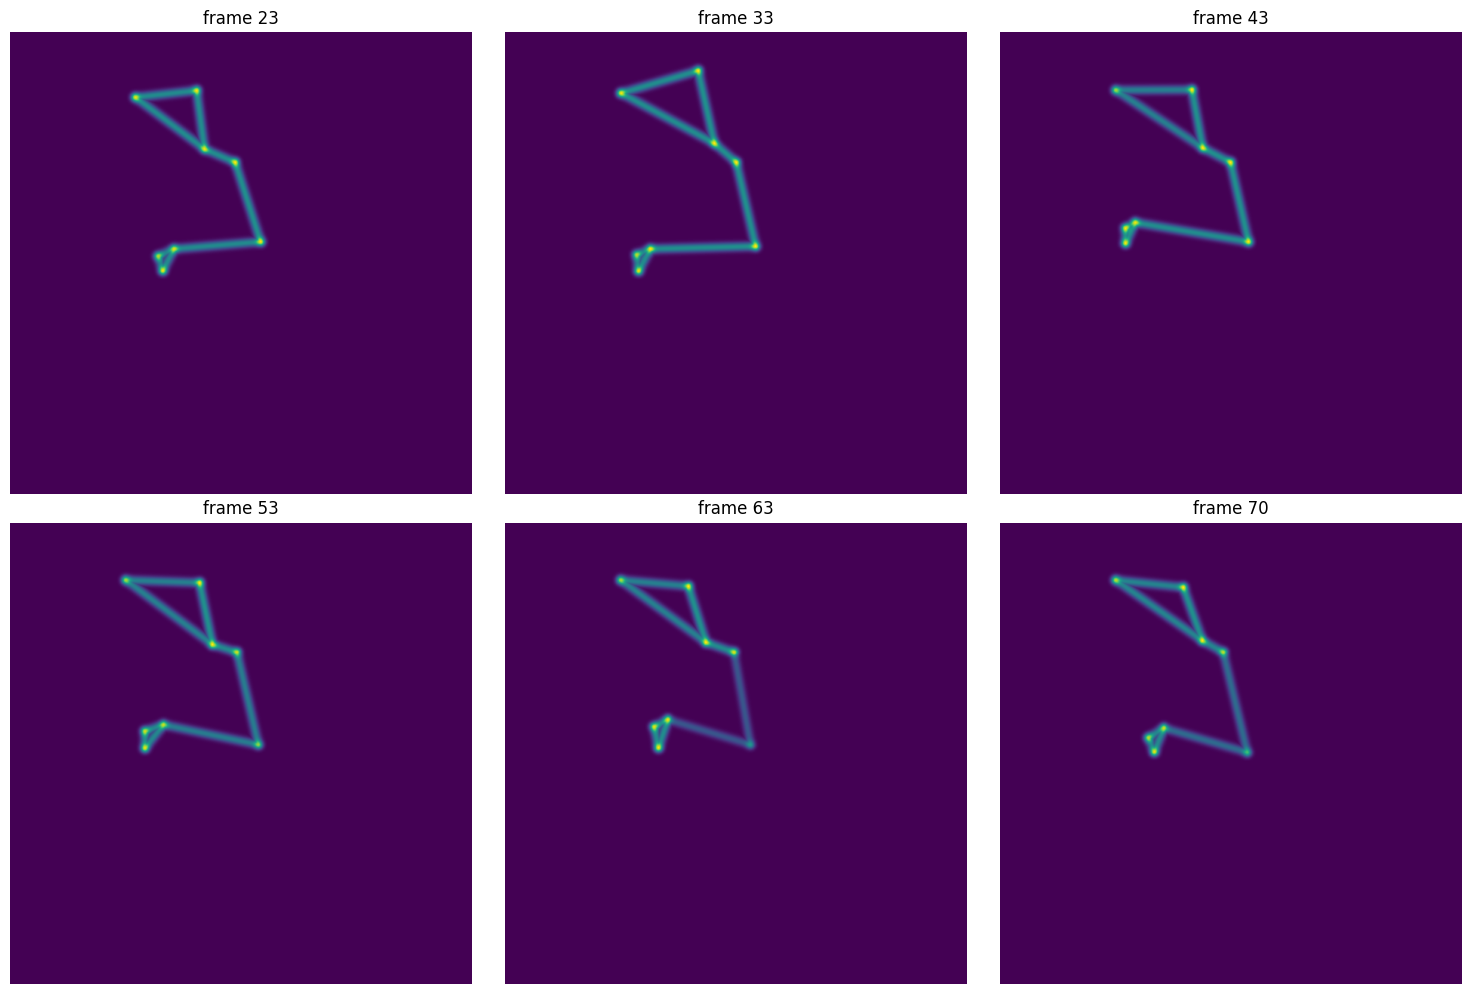

In [18]:
# sequence of keypoint heatmaps
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, index in enumerate(sequence_index):
    axs[i//3, i%3].imshow(fusion[index])
    axs[i//3, i%3].axis('off')
    axs[i//3, i%3].set_title(f'frame {index}')
plt.tight_layout()

In [19]:
# save the sequence of keypoint heatmaps
os.makedirs('./fusion_heatmaps', exist_ok=True)
for i, index in enumerate(sequence_index):
    plt.imshow(fusion[index])
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'./fusion_heatmaps/{os.path.basename(video_name)}_{index}.png', dpi=600)
    plt.close()
    # cv2.imwrite(f'./fusion_heatmaps/{os.path.basename(video_name)}_{index}.png', fusion[index])

In [20]:
def boarder_white(img,boarder_len=2):
    # set boarder image to white
    pixel_len = boarder_len
    zero = np.ones(img.shape,dtype=np.uint8) * 255
    # zero = np.zeros(img.shape,dtype=np.uint8)
    zero[pixel_len:-pixel_len, pixel_len:-pixel_len-1] = img[pixel_len:-pixel_len, pixel_len:-pixel_len-1]
    return zero

In [23]:
# save the sequence of video frames
os.makedirs('./video_frames', exist_ok=True)
for i, index in enumerate(sequence_index):
    # plt.imshow(boarder_white(videodata[index]))
    # plt.axis('off')
    # plt.tight_layout()
    # plt.savefig(f'./video_frames/{os.path.basename(video_name)}_{index}.png', dpi=600)
    # plt.close()
    cv2.imwrite(f'./video_frames/{os.path.basename(video_name)}_{index}.png', boarder_white(videodata[index]))

In [22]:
import cv2


keypoint = [cv2.resize(img, (videodata.shape[2], videodata.shape[1])) for img in keypoint]
line = [cv2.resize(img, (videodata.shape[2], videodata.shape[1])) for img in line]
fusion = [cv2.resize(img, (videodata.shape[2], videodata.shape[1])) for img in fusion]


In [23]:
# # plot in one figure for comparison (original video, keypoint, line, fusion) (2 x 2)
# # resize to same size
# fig, axs = plt.subplots(2, 2, figsize=(11, 10))
# index = 50
# font_size = 20
# points_cord = processor.keypoints[index]
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# # circle keypoints
# for point in points_cord:# 243,229,30
#     img = cv2.circle(videodata[index], (int(point[0]*videodata.shape[1]), int(point[1]*videodata.shape[2])), 5, (0,0,255), -1)
# axs[0, 0].imshow(img)
# axs[0, 0].set_title('RGB Frame with Keypoints (Blue)', fontsize=font_size)
# axs[0, 1].imshow(keypoint[index])
# axs[0, 1].set_title('Keypoint', fontsize=font_size)
# axs[1, 0].imshow(line[index])
# axs[1, 0].set_title('Line', fontsize=font_size)
# axs[1, 1].imshow(fusion[index])
# axs[1, 1].set_title('Skeleton (Keypoint + Line)', fontsize=font_size)
# # invisible axis
# for ax in axs.flatten():
#     ax.axis('off')
# # 202,224,30
# plt.tight_layout()
# # colorbar for all subplots
# divider = make_axes_locatable(axs[1, 1])  # 以右下角的子图为基准
# cax = divider.append_axes("right", size="5%", pad=0.5)  # 设置 colorbar 的宽度和间距
# cbar = fig.colorbar(axs[1, 1].imshow(fusion[index]), cax=cax)
# plt.savefig(os.path.join('../analysis', 'heatmap.png'),dpi=500)
# plt.close()

In [43]:
from matplotlib.gridspec import GridSpec
index = 50
font_size = 20
# 创建数据
points_cord = processor.keypoints[index]
for point in points_cord:# 243,229,30
    img = cv2.circle(videodata[index], (int(point[0]*videodata.shape[1]), int(point[1]*videodata.shape[2])), 5, (0,0,255), -1)
# set boarder image to white
pixel_len = 2
zero = np.ones(img.shape,dtype=np.uint8) * 255
# zero = np.zeros(img.shape,dtype=np.uint8)
zero[pixel_len:-pixel_len, pixel_len:-pixel_len-1] = img[pixel_len:-pixel_len, pixel_len:-pixel_len-1]

data1 = zero
data2 = keypoint[index]
data3 = line[index]
data4 = fusion[index]

# 创建 2x2 的子图布局，并预留右侧空间
fig = plt.figure(figsize=(9.2, 8))
gs = GridSpec(2, 3, width_ratios=[1, 1, 0.05])  # 2 行 3 列，右侧宽度为 0.05

# 创建子图
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# title 
ax1.set_title('RGB Frame with Keypoints', fontsize=font_size, y=-0.1)
ax2.set_title('Keypoint Only', fontsize=font_size, y=-0.1)
ax3.set_title('Line Only', fontsize=font_size, y=-0.1)
ax4.set_title('Skeleton (Keypoint + Line)', fontsize=font_size, y=-0.1)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax4.axis('off')

# 在每个子图中显示图像
im1 = ax1.imshow(data1)
im2 = ax2.imshow(data2)
im3 = ax3.imshow(data3)
im4 = ax4.imshow(data4)


# 在右侧添加 colorbar
cax = fig.add_subplot(gs[:, 2])  # 占用所有行的第 3 列
cbar = fig.colorbar(im4, cax=cax)
cbar.ax.tick_params(labelsize=15)
cbar.set_label('')

# plt.subplots_adjust(wspace=2)
# 调整布局
plt.tight_layout()

# 显示图像
plt.savefig(os.path.join('../analysis', 'heatmap.png'),dpi=600)
plt.show()
plt.close()

In [63]:
# circle the keypoint on the original frame
plt.close()
import copy
font_size = 20
index = 50
img = copy.deepcopy(videodata[index])
point = np.array(keypoint[index] * 255, dtype=np.uint8)
point = cv2.cvtColor(point, cv2.COLOR_GRAY2RGB)

img += point
plt.imshow(img)
plt.savefig(os.path.join('../analysis', 'keypoint.png'))
plt.close()

In [5]:
demo=os.listdir(root)[0]
demo=os.path.join(root,demo)
demo=np.load(demo)

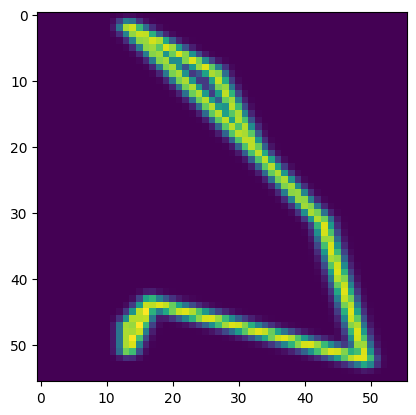

In [6]:
plt.imshow(demo[0])

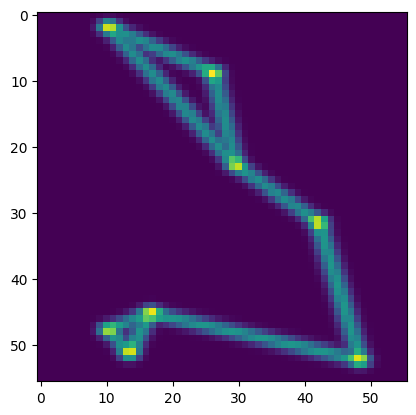

In [13]:
root='../tmp/raw_heatmap_sigma4_p0.23'
demo=os.listdir(root)[0]
demo=os.path.join(root,demo)
demo=np.load(demo)
plt.imshow(demo[32])

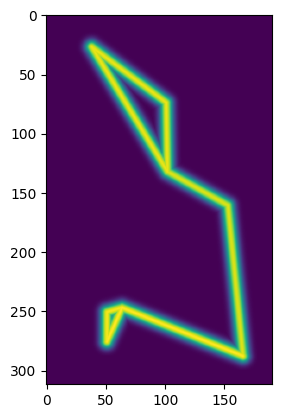

In [9]:
root='../data/swallow/stage_2/raw_heatmap_sigma4_line'
demo=os.listdir(root)[0]
demo=os.path.join(root,demo)
demo=np.load(demo)
plt.imshow(demo[3])

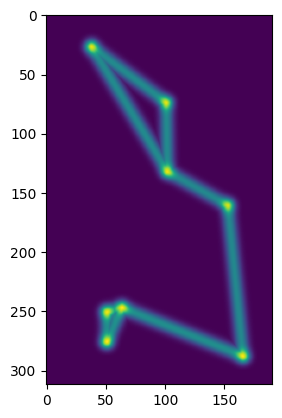

In [14]:
root='../data/swallow/stage_2/raw_heatmap_sigma4'
demo=os.listdir(root)[0]
demo=os.path.join(root,demo)
demo=np.load(demo)
plt.imshow(demo[3])

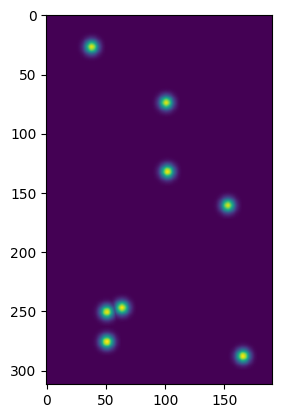

In [15]:
root='../data/swallow/stage_2/raw_heatmap_sigma4_keypoint'
demo=os.listdir(root)[0]
demo=os.path.join(root,demo)
demo=np.load(demo)
plt.imshow(demo[3])

In [ ]:
# data manifold for video features using t-sne